In [33]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
from pocket_cube.astar import astar
from pocket_cube.bidirectionalBFS import bidirectional_bfs

import time

%matplotlib inline

# Creating a scrambled cube 

In [34]:
cube = Cube("F' R U R U F' U'")

## 2D Cube visualization 

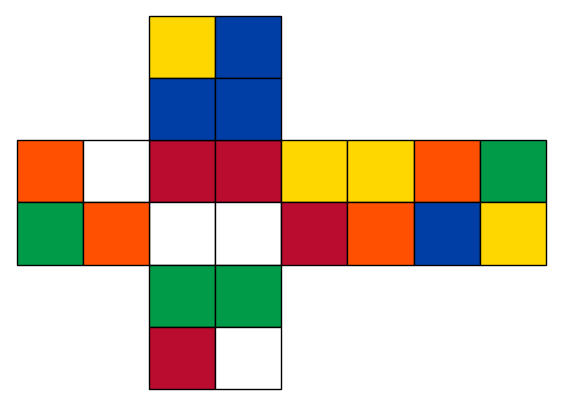

In [35]:
cube.render()

## Text representation 

In [36]:
cube.render_text()

  YB
  BB
OWRRYYOG
GOWWROBY
  GG
  RW


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

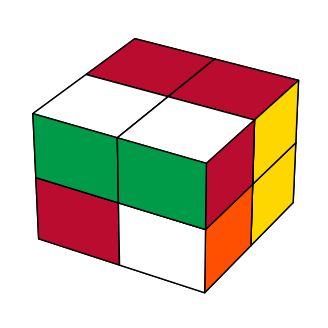

In [37]:
cube.render3D()

# Creating an unscrambled cube 

In [38]:
cube = Cube(scrambled=False)

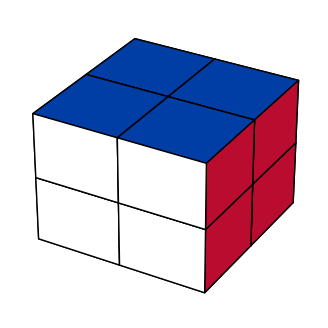

In [39]:
cube.render3D()

## Applying moves on the cube 

In [40]:
cube.scramble()

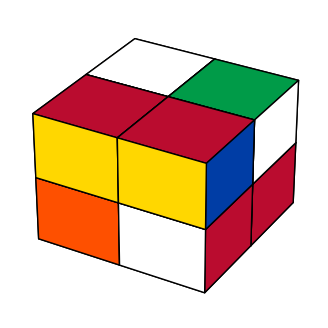

In [41]:
cube.render3D()

## Tests (ascending complexity)

In [42]:
case1 = "R U' R' F' U"
case2 = "F' R U R U F' U'"
case3 = "F U U F' U' R R F' R"
case4 = "U' R U' F' R F F U' F U U"

# A* Algorithm

### Defined a function that will actually apply the solution (list of moves) to the Cube
- Basically it will solve the cube (so we can render the solved cube for example)

In [43]:
def apply_solution(cube, solution_moves):
    """Apply the solution moves to the cube."""
    for move in solution_moves:
        cube.state = Cube.move_state(cube.state, move)

In [44]:
# Run A* algorithm with the defined heuristic
cube_copy = cube.clone()
start_time = time.time()
solution, moves = astar(cube_copy)
end_time = time.time()

print("Solution of length " + str(len(solution)) + " :\n", [Move(move) for move in solution])
print("Number of states discovered:", moves)
# Print the execution time
print("Execution Time:", end_time - start_time, "seconds\n")
apply_solution(cube_copy, solution);

Solution of length 5 :
 [<Move.F: 1>, <Move.Rp: 3>, <Move.U: 2>, <Move.Rp: 3>, <Move.Fp: 4>]
Number of states discovered: 56
Execution Time: 0.08976387977600098 seconds



Cube solved by A* algorithm


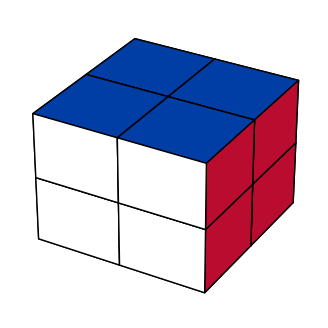

In [45]:
print("Cube solved by A* algorithm")
cube_copy.render3D()

## Let's define a function that will test the algorithm using the 4 test cases that we've got

In [46]:
def TestFunction(algorithm):
    print("Running the 4 dificulty tests for the algorithm")
    Test(algorithm, case1, 1)
    Test(algorithm, case2, 2)
    Test(algorithm, case3, 3)
    solution = Test(algorithm, case4, 4)
    # Let's render just most difficult one after solving it
    if solution:
        cube4 = Cube(case4)
        print("Cube4 initial state")
        cube4.render3D()
        apply_solution(cube4, solution);
        print("Cube4 after solving by A*")
        cube4.render3D()
    
def Test(algorithm, test_case, test_number):
    cube = Cube(test_case)
    start_time = time.time()
    solution, moves = algorithm(cube)
    end_time = time.time()
    
    # Print the solution and the number of iterations
    print("TEST " + str(test_number))
    print("Solution of length " + str(len(solution)) + " :\n", [Move(move) for move in solution])
    print("Number of states discovered:", moves)
    # Print the execution time
    print("Execution Time:", end_time - start_time, "seconds\n")
    return solution


## A* Algorithm Testing

In [47]:
#TestFunction(astar)

# Bidirectional BFS Algorithm

In [48]:
# Run A* algorithm with the defined heuristic
cube_copy = cube.clone()
start_time = time.time()
solution, moves = bidirectional_bfs(cube_copy)
end_time = time.time()

print("Solution of length " + str(len(solution)) + " :\n", [Move(move) for move in solution])
print("Number of states discovered:", moves)
# Print the execution time
print("Execution Time:", end_time - start_time, "seconds\n")
apply_solution(cube_copy, solution);

Solution of length 3 :
 [<Move.Up: 5>, <Move.R: 0>, <Move.F: 1>]
Number of states discovered: 122
Execution Time: 0.08876442909240723 seconds



Cube initial state


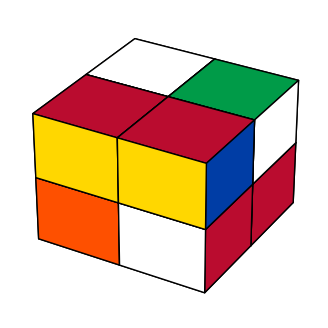

In [49]:
print("Cube initial state")
cube.render3D()

Cube solved by Bidirectional BFS


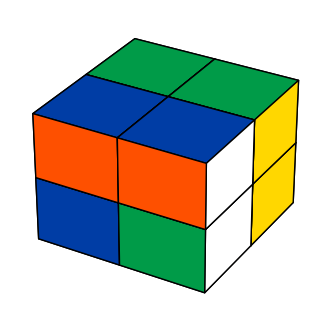

In [50]:
print("Cube solved by Bidirectional BFS")
cube_copy.render3D()

## Bidirectional BFS Algorithm Testing

In [51]:
#TestFunction(bidirectional_bfs)